In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/csv/ML PROJECT/code_ques.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,-1.571526,-1.962069,-0.794640,1.148723,-0.897512,2.229886,-1.210639,-0.204680,-0.996293,0.031537,...,-0.584903,0.719287,-0.425212,-0.457718,-1.587668,-1.335358,-0.231586,-0.983708,0.262058,1.0
1172,-1.461881,-2.904476,-2.231147,0.918863,-0.961818,1.781181,-1.926827,0.092465,-0.959193,0.037899,...,-1.129538,0.572475,-1.104132,-1.567344,-1.499669,-1.042250,-0.266043,-1.289798,-0.193324,8.0
1173,-1.538304,-4.291207,0.067668,0.439347,1.269486,-4.050520,-1.140613,-0.827843,0.060943,-2.945170,...,0.350203,-0.040586,-0.060162,1.159763,-0.654571,0.432144,-1.303155,0.558824,-1.254930,2.0
1174,-1.357663,-3.192011,-2.486930,0.841529,-1.150033,2.045513,-1.792666,0.260370,-1.058991,0.145268,...,-0.952910,0.735465,-1.033196,-1.343665,-1.459567,-1.183662,-0.165547,-1.208571,-0.030115,8.0


In [8]:
#Checking for null values if any:

for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col)
    print(df[col].isnull().sum())

score
4


In [9]:
df.dropna(inplace=True)
df.shape

(1172, 769)

In [11]:
#Converting to binary classification from multiclass classification of the score:
#We consider scores 1-5 --> 0 ; scores 6-10 --> 1

import numpy as np
df['Final_score'] = np.where(df['score'] > 5, 1, 0)

df.shape
df.dtypes

0              float64
1              float64
2              float64
3              float64
4              float64
                ...   
765            float64
766            float64
767            float64
score          float64
Final_score      int64
Length: 770, dtype: object

In [15]:
score_0 = df[df['Final_score'] == 0]
score_1 = df[df['Final_score'] == 1]

mean_0 = np.mean(score_0.drop(columns=['Final_score','score']), axis=0)
mean_1 = np.mean(score_1.drop(columns=['Final_score', 'score']), axis=0)

In [16]:
std_0 = np.std(score_0.drop(columns=['Final_score','score']), axis=0)
std_1 = np.std(score_1.drop(columns=['Final_score', 'score']), axis=0)

In [18]:
# Calculate intraclass spread
intra_class_spread_0 = std_0
intra_class_spread_1 = std_1

# Calculate interclass distance
interclass_distance = np.linalg.norm(mean_0 - mean_1)  #Euclidean distance

In [20]:
print("Mean for class with scores 1 to 5:", mean_0)
print("Mean for class with scores 6 to 10:", mean_1)
print("\nStandard deviation/Intraclass spread for class with scores 1 to 5:", std_0)
print("Standard deviation /Intraclass spread for class with scores 6 to 10:", std_1)
print("\nInterclass distance between both the score classes:", interclass_distance)

Mean for class with scores 1 to 5: 0     -1.457709
1     -0.496628
2      0.103571
3      0.453621
4      0.188757
         ...   
763   -0.677815
764   -1.902068
765   -0.585410
766   -0.462797
767    0.227653
Length: 768, dtype: float64
Mean for class with scores 6 to 10: 0     -1.154767
1     -0.445345
2      0.297963
3      0.328955
4      0.320128
         ...   
763   -0.739276
764   -1.680239
765   -0.384973
766   -0.342692
767    0.210742
Length: 768, dtype: float64

Standard deviation/Intraclass spread for class with scores 1 to 5: 0      1.400135
1      1.303291
2      1.037832
3      0.737086
4      0.961492
         ...   
763    0.968520
764    0.983178
765    0.986345
766    1.241415
767    1.132788
Length: 768, dtype: float64
Standard deviation /Intraclass spread for class with scores 6 to 10: 0      1.083977
1      1.438532
2      1.214320
3      0.927139
4      0.968277
         ...   
763    1.137902
764    1.059974
765    1.147264
766    1.105048
767    1.167303
Leng

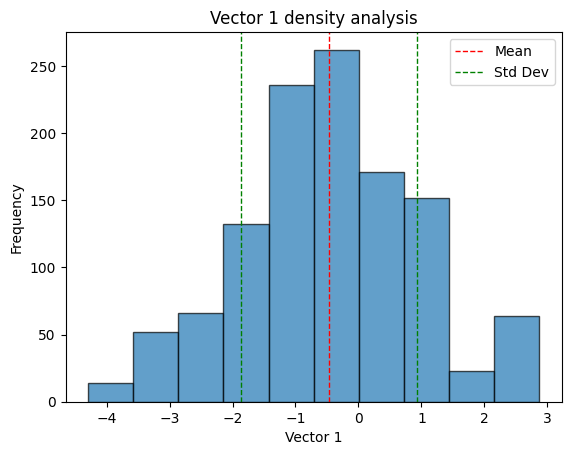

Mean: -0.4621912658953925
Variance: 1.9481460659674437


In [25]:
# Calculate histogram data and bin edges
hist, bin_edges = np.histogram(df['1'], bins=10)

# Calculate mean and variance
mean_v1 = np.mean(df['1'])
variance_v1 = np.var(df['1'])

import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['1'], bins=bin_edges, edgecolor='black', alpha=0.7)
plt.xlabel('Vector 1')
plt.ylabel('Frequency')
plt.title('Vector 1 density analysis')

# Display the mean and variance
plt.axvline(x=mean_v1, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(x=mean_v1 + np.sqrt(variance_v1), color='g', linestyle='dashed', linewidth=1, label='Std Dev')
plt.axvline(x=mean_v1 - np.sqrt(variance_v1), color='g', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

print(f"Mean: {mean_v1}")
print(f"Variance: {variance_v1}")

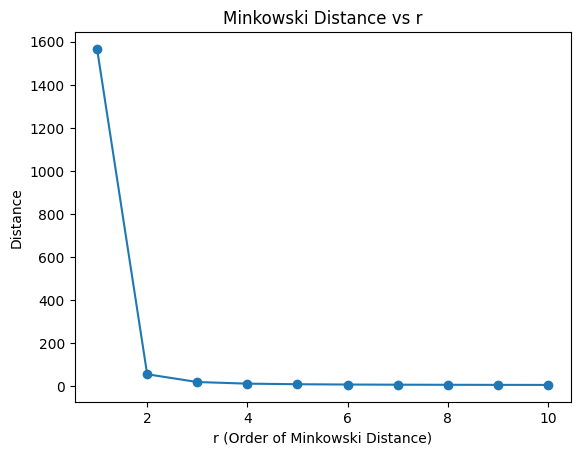

In [26]:
x1 = df['1']
y1 = df['2']

# Calculate Minkowski distances for r from 1 to 10
r_values = range(1, 11)
distances = []

for r in r_values:
    distance = np.linalg.norm(x1 - y1, ord=r)
    distances.append(distance)

# Plot the Minkowski distances
plt.plot(r_values, distances, marker='o')
plt.xlabel('r (Order of Minkowski Distance)')
plt.ylabel('Distance')
plt.title('Minkowski Distance vs r')
plt.show()

In [27]:
#Train-Test split

X=df.iloc[:,:]
X=X.drop(['score','Final_score'],axis=1)
print(X.shape)
y=df['Final_score']
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


(1172, 768)
(1172,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# Assuming you have already trained the k-NN classifier 'neigh' and have X_test and y_test available
accuracy = neigh.score(X_test, y_test)
print(f"Accuracy of the k-NN classifier: {accuracy:.2f}")


Accuracy of the k-NN classifier: 0.74


In [30]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
630,-0.808941,-1.114040,0.776520,0.512101,-0.671203,2.088315,0.204370,0.311150,-0.657111,0.726726,...,0.737588,-0.333720,-0.576037,0.315168,-0.562272,-0.136573,-1.076604,-0.018301,0.918834,-0.894891
220,-4.152245,1.160243,1.337246,0.043729,-0.157248,1.933729,-1.721512,0.670636,0.150949,-2.239173,...,2.288042,-1.622204,-1.628251,-0.859849,0.927310,-0.113286,-2.237566,-0.787939,-0.250120,0.179621
682,-1.239676,-1.557235,0.920946,-0.271211,-0.926902,-0.750530,-1.788462,-2.365825,-0.716611,-1.101322,...,1.932884,0.394847,-0.321211,-1.043889,-1.413708,0.692935,-0.638757,-1.586035,-0.272297,1.066647
934,-0.477266,-0.648367,0.227008,-0.045757,0.629828,0.560027,-0.351469,0.448678,-0.834369,-0.954992,...,2.398233,-2.597980,0.249446,-2.153588,-1.995700,-0.750302,-2.241747,-2.104217,0.182099,0.481133
174,1.136052,1.252706,1.484573,0.295453,-0.716669,2.170231,-0.675068,-2.863017,-1.323282,0.272411,...,-1.591902,1.266611,0.473835,-3.233812,-0.434241,-0.497998,-0.442361,0.543713,0.766991,0.008665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,-0.307018,0.803321,1.988755,0.156549,2.126563,-0.146675,-2.995089,-0.696910,0.186734,-0.179549,...,2.300512,-1.776291,2.060178,-0.602523,-0.334227,-0.845994,-2.210237,-0.991063,-1.558055,0.936428
1078,-3.521266,0.808188,0.966908,-0.480480,-0.199743,0.129892,0.520289,-3.135644,-0.503889,0.878543,...,1.447495,-1.227816,0.658941,-1.339218,0.571878,0.882232,-2.473083,-1.241179,-0.385488,-1.120110
396,-0.675428,0.207200,0.024050,1.092065,0.167603,0.503034,-0.774605,-0.662855,-0.445020,0.123840,...,1.087257,-0.153807,-0.586528,1.161038,-0.644022,-0.821126,-0.483663,-0.029258,0.713369,-0.813362
457,0.616613,0.639383,1.692321,0.156984,1.041833,1.420604,-0.593015,1.107884,-0.156280,0.040217,...,-0.280790,0.384503,-1.099224,0.191504,-1.146277,-0.645312,-1.299775,0.433272,-1.819598,-0.481979


In [32]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_test

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.808941,-1.114040,0.776520,0.512101,-0.671203,2.088315,0.204370,0.311150,-0.657111,0.726726,...,0.737588,-0.333720,-0.576037,0.315168,-0.562272,-0.136573,-1.076604,-0.018301,0.918834,-0.894891
1,-4.152245,1.160243,1.337246,0.043729,-0.157248,1.933729,-1.721512,0.670636,0.150949,-2.239173,...,2.288042,-1.622204,-1.628251,-0.859849,0.927310,-0.113286,-2.237566,-0.787939,-0.250120,0.179621
2,-1.239676,-1.557235,0.920946,-0.271211,-0.926902,-0.750530,-1.788462,-2.365825,-0.716611,-1.101322,...,1.932884,0.394847,-0.321211,-1.043889,-1.413708,0.692935,-0.638757,-1.586035,-0.272297,1.066647
3,-0.477266,-0.648367,0.227008,-0.045757,0.629828,0.560027,-0.351469,0.448678,-0.834369,-0.954992,...,2.398233,-2.597980,0.249446,-2.153588,-1.995700,-0.750302,-2.241747,-2.104217,0.182099,0.481133
4,1.136052,1.252706,1.484573,0.295453,-0.716669,2.170231,-0.675068,-2.863017,-1.323282,0.272411,...,-1.591902,1.266611,0.473835,-3.233812,-0.434241,-0.497998,-0.442361,0.543713,0.766991,0.008665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-0.307018,0.803321,1.988755,0.156549,2.126563,-0.146675,-2.995089,-0.696910,0.186734,-0.179549,...,2.300512,-1.776291,2.060178,-0.602523,-0.334227,-0.845994,-2.210237,-0.991063,-1.558055,0.936428
348,-3.521266,0.808188,0.966908,-0.480480,-0.199743,0.129892,0.520289,-3.135644,-0.503889,0.878543,...,1.447495,-1.227816,0.658941,-1.339218,0.571878,0.882232,-2.473083,-1.241179,-0.385488,-1.120110
349,-0.675428,0.207200,0.024050,1.092065,0.167603,0.503034,-0.774605,-0.662855,-0.445020,0.123840,...,1.087257,-0.153807,-0.586528,1.161038,-0.644022,-0.821126,-0.483663,-0.029258,0.713369,-0.813362
350,0.616613,0.639383,1.692321,0.156984,1.041833,1.420604,-0.593015,1.107884,-0.156280,0.040217,...,-0.280790,0.384503,-1.099224,0.191504,-1.146277,-0.645312,-1.299775,0.433272,-1.819598,-0.481979


In [33]:
# Assuming you have already trained the k-NN classifier 'neigh' and have X_test available
# Let's say you want to predict the class for the first test vector
test_vector = X_test.loc[2, ]  # Replace 0 with the index of the specific test vector you want to predict

predicted_class = neigh.predict([test_vector])
print(f"The predicted class for the test vector is: {predicted_class[0]}")


The predicted class for the test vector is: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


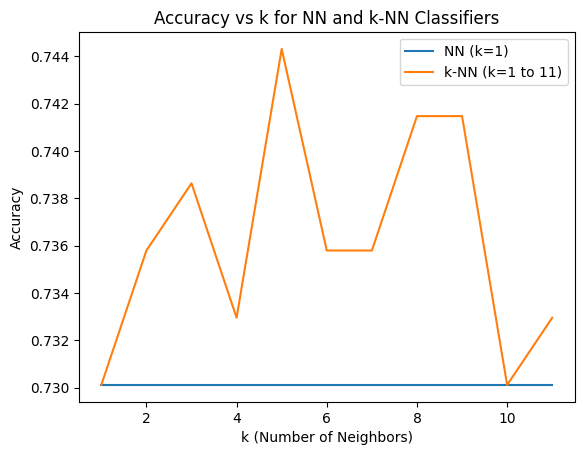

Accuracy for nn classifier: 0.7301136363636364
Accuracy for k-nn classifier: [0.7301136363636364, 0.7357954545454546, 0.7386363636363636, 0.7329545454545454, 0.7443181818181818, 0.7357954545454546, 0.7357954545454546, 0.7414772727272727, 0.7414772727272727, 0.7301136363636364, 0.7329545454545454]


In [35]:
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test, and y_test available
# Initialize the NN classifier with k=1
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train, y_train)

# Initialize the k-NN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Initialize arrays to store accuracy values
k_values = range(1, 12)
accuracy_nn = []
accuracy_knn = []

for k in k_values:
    # Train k-NN classifiers with different values of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Predict using both NN and k-NN classifiers
    y_pred_nn = nn_classifier.predict(X_test)
    y_pred_knn = knn_classifier.predict(X_test)

    # Calculate and store accuracy scores
    accuracy_nn.append(accuracy_score(y_test, y_pred_nn))
    accuracy_knn.append(accuracy_score(y_test, y_pred_knn))

# Plot the accuracy results
plt.plot(k_values, accuracy_nn, label='NN (k=1)')
plt.plot(k_values, accuracy_knn, label='k-NN (k=1 to 11)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for NN and k-NN Classifiers')
plt.legend()
plt.show()
print('Accuracy for nn classifier:',accuracy_nn[0])
print('Accuracy for k-nn classifier:',accuracy_knn)

In [36]:
y_train_pred = knn_classifier.predict(X_train)
y_train_true = y_train
y_test_pred = knn_classifier.predict(X_test)
y_test_true = y_test

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have 'y_train_true', 'y_train_pred', 'y_test_true', and 'y_test_pred' available

# Confusion Matrix and Classification Report for Training Data
confusion_matrix_train = confusion_matrix(y_train_true, y_train_pred)
classification_report_train = classification_report(y_train_true, y_train_pred)

# Confusion Matrix and Classification Report for Test Data
confusion_matrix_test = confusion_matrix(y_test_true, y_test_pred)
classification_report_test = classification_report(y_test_true, y_test_pred)

print("Confusion Matrix for Training Data:")
print(confusion_matrix_train)
print("\nClassification Report for Training Data:")
print(classification_report_train)

print("\nConfusion Matrix for Test Data:")
print(confusion_matrix_test)
print("\nClassification Report for Test Data:")
print(classification_report_test)


Confusion Matrix for Training Data:
[[147 119]
 [ 63 491]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62       266
           1       0.80      0.89      0.84       554

    accuracy                           0.78       820
   macro avg       0.75      0.72      0.73       820
weighted avg       0.77      0.78      0.77       820


Confusion Matrix for Test Data:
[[ 64  55]
 [ 39 194]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.62      0.54      0.58       119
           1       0.78      0.83      0.80       233

    accuracy                           0.73       352
   macro avg       0.70      0.69      0.69       352
weighted avg       0.73      0.73      0.73       352



In [40]:
from sklearn.metrics import f1_score
train_f1_score = f1_score(y_train_true,y_train_pred)
print("Training F1-Score:", train_f1_score)

test_f1_score = f1_score(y_test_true,y_test_pred)
print("Testing F1-Score:", test_f1_score)

threshold = 0.2

if abs(train_f1_score - test_f1_score) < threshold:

    outcome = "Regular Fit"  #the two scores are close to each other, indicating a "Regular Fit."

elif train_f1_score > test_f1_score:

    outcome = "Overfitting"  #Overfitting occurs when the model performs well on the training data but poorly on unseen (testing) data.

else:

    outcome = "Underfitting"

# Print the learning outcome

print("Model Learning Outcome:", outcome)


Training F1-Score: 0.8436426116838488
Testing F1-Score: 0.8049792531120332
Model Learning Outcome: Regular Fit
